In [32]:
import uproot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:

root_file = uproot.open('/data2/user_data/atlas/vostrel/UFP/YAG_scintillator/scripts/data/w_20/alpha/E_5/output.root')
tree = root_file['Hits1']

df = tree.arrays(library='pd')
df

,Event,Particle,EnergyDeposit,KineticEnergy,X,Y,Z
0,0,1000020040,0.242631,4.757369,4.491968e-07,0.000010,0.001000
1,0,1000020040,0.223546,4.533823,2.021758e-06,0.000032,0.002000
2,0,1000020040,0.246878,4.286945,7.318870e-06,0.000062,0.002999
3,0,1000020040,0.292233,3.994712,1.397144e-05,0.000106,0.003998
4,0,1000020040,0.300556,3.694156,-6.887120e-07,0.000147,0.004997
...,...,...,...,...,...,...,...
14518,999,1000020040,0.428928,1.867110,-8.104583e-05,-0.000081,0.009996
14519,999,1000020040,0.474475,1.392636,-1.019399e-04,-0.000110,0.010995
14520,999,1000020040,0.569789,0.822847,-1.026641e-04,-0.000099,0.011994
14521,999,1000020040,0.575596,0.247251,-1.221725e-04,-0.000119,0.012991


In [4]:
Zreached = df.groupby("Event")["Z"].max().reset_index()

Zreached["Z"].mean(), Zreached["Z"].std()

(0.014105274969826796, 0.0002846747807429201)

In [60]:
np.percentile(np.array(Zreached["Z"]), 99)

0.01481247462289904

In [10]:
df["Zceil"] = np.ceil(df["Z"]*1000)/1000
df

,Event,Particle,EnergyDeposit,KineticEnergy,X,Y,Z,Zceil
0,0,1000020040,0.242631,4.757369,4.491968e-07,0.000010,0.001000,0.001
1,0,1000020040,0.223546,4.533823,2.021758e-06,0.000032,0.002000,0.002
2,0,1000020040,0.246878,4.286945,7.318870e-06,0.000062,0.002999,0.003
3,0,1000020040,0.292233,3.994712,1.397144e-05,0.000106,0.003998,0.004
4,0,1000020040,0.300556,3.694156,-6.887120e-07,0.000147,0.004997,0.005
...,...,...,...,...,...,...,...,...
14518,999,1000020040,0.428928,1.867110,-8.104583e-05,-0.000081,0.009996,0.010
14519,999,1000020040,0.474475,1.392636,-1.019399e-04,-0.000110,0.010995,0.011
14520,999,1000020040,0.569789,0.822847,-1.026641e-04,-0.000099,0.011994,0.012
14521,999,1000020040,0.575596,0.247251,-1.221725e-04,-0.000119,0.012991,0.013


In [11]:
df.groupby("Zceil")["EnergyDeposit"].mean().reset_index()

,Zceil,EnergyDeposit
0,0.001,0.246827
1,0.002,0.256016
2,0.003,0.264946
3,0.004,0.275896
4,0.005,0.287822
5,0.006,0.303279
6,0.007,0.320505
7,0.008,0.343555
8,0.009,0.371767
9,0.010,0.409677


In [36]:
heights = results["EnergyDeposit"]  # Heights of the bins
right_edges = results["Zceil"]  # Right edges of the bins
heights, right_edges

(0     0.246827
 1     0.256016
 2     0.264946
 3     0.275896
 4     0.287822
 5     0.303279
 6     0.320505
 7     0.343555
 8     0.371767
 9     0.409677
 10    0.460569
 11    0.524832
 12    0.556567
 13    0.317970
 14    0.086398
 15    0.046159
 Name: EnergyDeposit, dtype: float64,
 0     0.001
 1     0.002
 2     0.003
 3     0.004
 4     0.005
 5     0.006
 6     0.007
 7     0.008
 8     0.009
 9     0.010
 10    0.011
 11    0.012
 12    0.013
 13    0.014
 14    0.015
 15    0.016
 Name: Zceil, dtype: float64)

In [37]:
left_edges

[-0.999,
 0.001,
 0.002,
 0.003,
 0.004,
 0.005,
 0.006,
 0.007,
 0.008,
 0.009,
 0.01,
 0.011,
 0.012,
 0.013,
 0.014,
 0.015]

In [47]:
df.groupby("Zceil")["EnergyDeposit"].std().reset_index().fillna(0)

,Zceil,EnergyDeposit
0,0.001,0.012615
1,0.002,0.012954
2,0.003,0.012267
3,0.004,0.012981
4,0.005,0.013332
5,0.006,0.013374
6,0.007,0.012909
7,0.008,0.013042
8,0.009,0.013815
9,0.010,0.014593


In [49]:
results_errors["EnergyDeposit"]

0     0.012615
1     0.012954
2     0.012267
3     0.012981
4     0.013332
5     0.013374
6     0.012909
7     0.013042
8     0.013815
9     0.014593
10    0.018102
11    0.023035
12    0.039607
13    0.110250
14    0.057623
15    0.000000
Name: EnergyDeposit, dtype: float64

In [50]:
heights

0     0.246827
1     0.256016
2     0.264946
3     0.275896
4     0.287822
5     0.303279
6     0.320505
7     0.343555
8     0.371767
9     0.409677
10    0.460569
11    0.524832
12    0.556567
13    0.317970
14    0.086398
15    0.046159
Name: EnergyDeposit, dtype: float64

In [54]:
np.array(right_edges)-0.5

array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
       11.5, 12.5, 13.5, 14.5, 15.5])

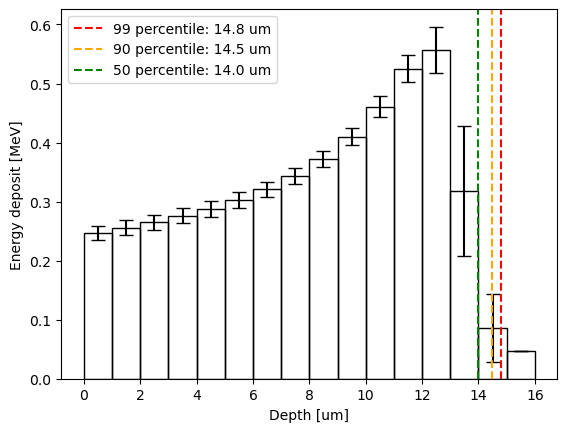

In [73]:
# Sample data: heights of each bin and their right edges
results = df.groupby("Zceil")["EnergyDeposit"].mean().reset_index()
heights = results["EnergyDeposit"]  # Heights of the bins
right_edges = results["Zceil"]*1000  # Right edges of the bins
results_errors = df.groupby("Zceil")["EnergyDeposit"].std().reset_index().fillna(0)

# Create the histogram with outlines only
plt.bar(right_edges-0.5, heights, width=1, edgecolor='black', fill=False)
plt.errorbar(right_edges-0.5, heights, yerr=results_errors["EnergyDeposit"], fmt='none', color='black', capsize=5)

def percentile(n, color):
    percentile_n = np.percentile(np.array(Zreached["Z"]*1000), n)
    plt.axvline(x=percentile_n, color=color, linestyle='--', label=f'{n} percentile: {percentile_n:.1f} um')

percentile(99, "red")
percentile(90, "orange")
percentile(50, "green")

# Set labels and title
plt.ylabel('Energy deposit [MeV]')
plt.xlabel('Depth [um]')

plt.legend()

# Show the plot
plt.show()

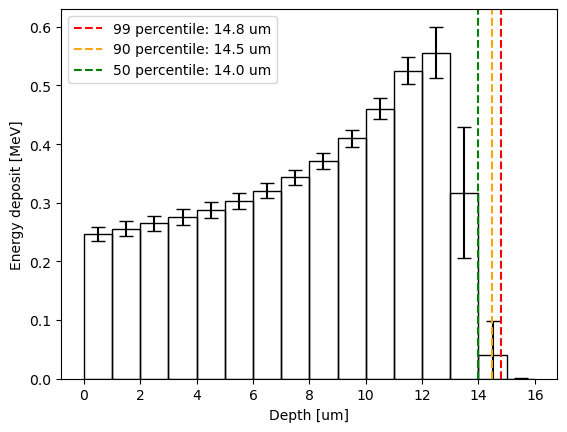

In [75]:
# Sample data: heights of each bin and their right edges
results = merged.groupby("Zceil")["EnergyDeposit"].mean().reset_index()
heights = results["EnergyDeposit"]  # Heights of the bins
right_edges = results["Zceil"]*1000  # Right edges of the bins
results_errors = merged.groupby("Zceil")["EnergyDeposit"].std().reset_index().fillna(0)

# Create the histogram with outlines only
plt.bar(right_edges-0.5, heights, width=1, edgecolor='black', fill=False)
plt.errorbar(right_edges-0.5, heights, yerr=results_errors["EnergyDeposit"], fmt='none', color='black', capsize=5)

def percentile(n, color):
    percentile_n = np.percentile(np.array(Zreached["Z"]*1000), n)
    plt.axvline(x=percentile_n, color=color, linestyle='--', label=f'{n} percentile: {percentile_n:.1f} um')

percentile(99, "red")
percentile(90, "orange")
percentile(50, "green")

plt.ylim(0)

# Set labels and title
plt.ylabel('Energy deposit [MeV]')
plt.xlabel('Depth [um]')

plt.legend()

# Show the plot
plt.show()

In [57]:
df.groupby("Zceil").count().reset_index().fillna(0)

,Zceil,Event,Particle,EnergyDeposit,KineticEnergy,X,Y,Z
0,0.001,1000,1000,1000,1000,1000,1000,1000
1,0.002,1000,1000,1000,1000,1000,1000,1000
2,0.003,1000,1000,1000,1000,1000,1000,1000
3,0.004,1000,1000,1000,1000,1000,1000,1000
4,0.005,1000,1000,1000,1000,1000,1000,1000
5,0.006,1000,1000,1000,1000,1000,1000,1000
6,0.007,1000,1000,1000,1000,1000,1000,1000
7,0.008,1000,1000,1000,1000,1000,1000,1000
8,0.009,1000,1000,1000,1000,1000,1000,1000
9,0.010,1001,1001,1001,1001,1001,1001,1001


In [ ]:
# Sample data: heights of each bin and their right edges
results = df.groupby("Zceil")["EnergyDeposit"].mean().reset_index()
heights = results["EnergyDeposit"]  # Heights of the bins
right_edges = results["Zceil"]*1000  # Right edges of the bins
results_errors = df.groupby("Zceil")["EnergyDeposit"].std().reset_index().fillna(0)

# Create the histogram with outlines only
plt.bar(right_edges-0.5, heights, width=1, edgecolor='black', fill=False)
plt.errorbar(right_edges-0.5, heights, yerr=results_errors["EnergyDeposit"], fmt='none', color='black', capsize=5)

# Create a second y-axis
ax2 = ax1.twinx()

particle_counts = df.groupby("Zceil").count().reset_index().fillna(0)
# Plot the second histogram on the right y-axis
ax2.bar(right_edges-0.5, particle_counts, width=0.4, color='orange', alpha=0.5, label='Particle Counts')

# Set labels and title
plt.xlabel('Bins')
plt.ylabel('Height')
plt.title('Histogram with Outlines Only')

# Show the plot
plt.show()

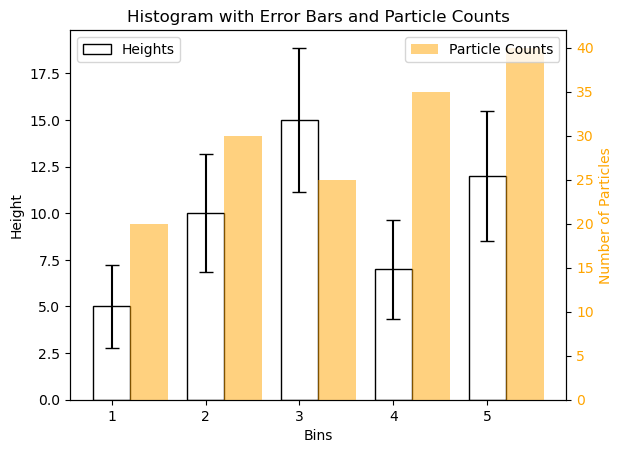

In [56]:
import numpy as np
import matplotlib.pyplot as plt

# Example binned data for the first histogram
heights = np.array([5, 10, 15, 7, 12])  # Heights of the bins
bin_centers = np.array([1, 2, 3, 4, 5])  # Centers of the bins
errors = np.sqrt(heights)  # Errors for the first histogram

# Example data for the second histogram (number of particles)
particle_counts = np.array([20, 30, 25, 35, 40])  # Number of particles corresponding to each bin

# Create the first histogram with outlines only
fig, ax1 = plt.subplots()

# Plot the first histogram
ax1.bar(bin_centers, heights, width=0.4, edgecolor='black', fill=False, align='center', label='Heights')
ax1.errorbar(bin_centers, heights, yerr=errors, fmt='none', color='black', capsize=5)

# Set labels and title for the first y-axis
ax1.set_xlabel('Bins')
ax1.set_ylabel('Height', color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_title('Histogram with Error Bars and Particle Counts')

# Create a second y-axis
ax2 = ax1.twinx()

# Plot the second histogram on the right y-axis
ax2.bar(bin_centers + 0.4, particle_counts, width=0.4, color='orange', alpha=0.5, label='Particle Counts')

# Set labels for the second y-axis
ax2.set_ylabel('Number of Particles', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Show legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show the plot
plt.show()


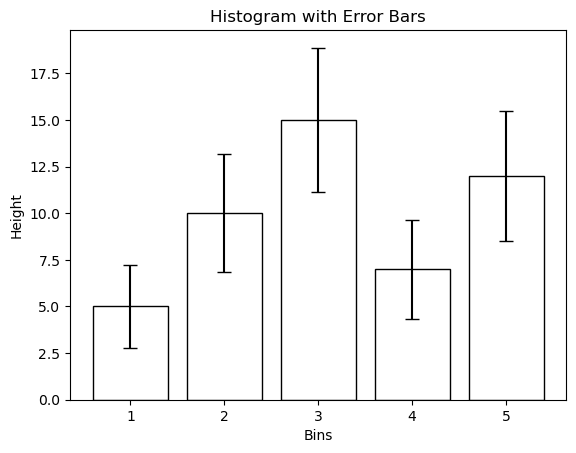

In [43]:
# Example binned data
heights = np.array([5, 10, 15, 7, 12])  # Heights of the bins
bin_centers = np.array([1, 2, 3, 4, 5])  # Centers of the bins

# Define the errors for each bin (for example, using the square root of the heights)
errors = np.sqrt(heights)  # You can define your own error values if needed

# Create the histogram with outlines only
plt.bar(bin_centers, heights, width=0.8, edgecolor='black', fill=False, align='center')

# Add error bars
plt.errorbar(bin_centers, heights, yerr=errors, fmt='none', color='black', capsize=5)

# Set labels and title
plt.xlabel('Bins')
plt.ylabel('Height')
plt.title('Histogram with Error Bars')

# Show the plot
plt.show()

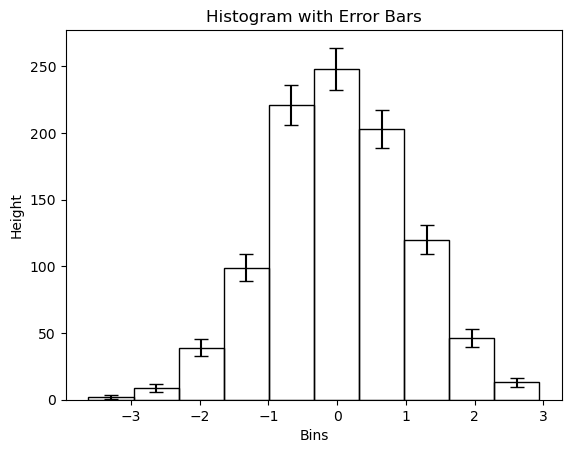

In [42]:
data = np.random.randn(1000)  # Generate random data

# Calculate the histogram
heights, bin_edges = np.histogram(data, bins=10)

# Define the bin centers for plotting
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])

# Define the errors for each bin (for example, using the square root of the heights)
errors = np.sqrt(heights)

# Create the histogram with outlines only
plt.bar(bin_centers, heights, width=np.diff(bin_edges), edgecolor='black', fill=False, align='center')

# Add error bars
plt.errorbar(bin_centers, heights, yerr=errors, fmt='none', color='black', capsize=5)

# Set labels and title
plt.xlabel('Bins')
plt.ylabel('Height')
plt.title('Histogram with Error Bars')

# Show the plot
plt.show()

In [14]:
n_entries = len(df["Zceil"].unique())

dff_temp = pd.DataFrame(index=pd.MultiIndex.from_product([df["Event"].unique(),df["Zceil"].unique() ], names=["Event", "Zceil"])).reset_index()
dff_temp

,Event,Zceil
0,0,0.001
1,0,0.002
2,0,0.003
3,0,0.004
4,0,0.005
...,...,...
15995,999,0.012
15996,999,0.013
15997,999,0.014
15998,999,0.015


In [28]:
merged = pd.merge(df, dff_temp, on=["Event", "Zceil"], how="right").fillna(0)
merged

,Event,Particle,EnergyDeposit,KineticEnergy,X,Y,Z,Zceil
0,0,1.000020e+09,0.242631,4.757369,4.491968e-07,0.000010,0.001000,0.001
1,0,1.000020e+09,0.223546,4.533823,2.021758e-06,0.000032,0.002000,0.002
2,0,1.000020e+09,0.246878,4.286945,7.318870e-06,0.000062,0.002999,0.003
3,0,1.000020e+09,0.292233,3.994712,1.397144e-05,0.000106,0.003998,0.004
4,0,1.000020e+09,0.300556,3.694156,-6.887120e-07,0.000147,0.004997,0.005
...,...,...,...,...,...,...,...,...
16060,999,1.000020e+09,0.569789,0.822847,-1.026641e-04,-0.000099,0.011994,0.012
16061,999,1.000020e+09,0.575596,0.247251,-1.221725e-04,-0.000119,0.012991,0.013
16062,999,1.000020e+09,0.247251,0.000000,-1.370331e-04,-0.000143,0.013895,0.014
16063,999,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.015


In [29]:
merged.groupby("Zceil")["EnergyDeposit"].mean().reset_index()

,Zceil,EnergyDeposit
0,0.001,0.246827
1,0.002,0.256016
2,0.003,0.264946
3,0.004,0.275896
4,0.005,0.287822
5,0.006,0.303279
6,0.007,0.320505
7,0.008,0.343555
8,0.009,0.371767
9,0.010,0.409677


In [5]:

root_file = uproot.open('/Users/zdenekvostrel/Programming/FJFI/Diplomka/positronProductionCC/cmake-build-debug/output.root')
tree = root_file['Hits']

df = tree.arrays(library='pd')
df

,Event,Particle,E,X,Y,Z,pX,pY,pZ,TOF1,TOF2,vertexX,vertexY,vertexZ
0,1,-11,9.871426,0.045818,-0.024436,0.51,3.721647,2.473918,8.787093,0.018415,0.000511,-0.008883,-0.031392,0.367207
1,38,-11,49.982890,0.031279,-0.040005,0.51,1.914856,-1.421990,49.923336,0.018381,0.000440,0.023939,-0.033462,0.378448
2,64,-11,5.422078,0.038677,-0.060641,0.51,1.306274,-3.126306,4.202103,0.018387,0.000437,0.016284,-0.034536,0.380496
3,67,-11,5.108860,-0.068796,-0.147551,0.51,1.776106,0.528715,4.733417,0.018438,0.001264,-0.048658,0.009398,0.145872
4,79,-11,6.967707,0.041020,-0.049000,0.51,1.702140,-4.032241,5.397367,0.018462,0.000868,0.021800,0.011811,0.274050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,9864,-11,6.637279,-0.075711,-0.037123,0.51,-2.372647,-1.114949,6.076166,0.018352,0.001455,-0.009397,-0.006028,0.065457
244,9916,-11,46.320646,0.056992,0.026203,0.51,-2.678700,-0.187406,46.239924,0.018387,0.002014,0.013025,0.008221,-0.091854
245,9952,-11,9.852740,0.088930,-0.010719,0.51,6.182563,3.762074,6.666188,0.018518,0.000819,0.008858,-0.037726,0.305496
246,9967,-11,13.000542,-0.016584,-0.023841,0.51,-0.238568,2.027734,12.829043,0.018367,0.001142,-0.009372,0.005436,0.163862


In [4]:
array = tree.to_numpy(library='np')

print(array)

AttributeError: 'Model_TTree_v5' object has no attribute 'to_numpy'

In [19]:
# Sample DataFrame 1
data1 = {
    'A': [1, 2, 3],
    'B': ['X', 'Y', 'Z'],
    'C': [10, 20, 30]
}
df1 = pd.DataFrame(data1)

# Sample DataFrame 2
data2 = {
    'B': ['X', 'Y', 'W'],
    'D': [100, 200, 300]
}
df2 = pd.DataFrame(data2)

# Display the DataFrames
print("DataFrame 1:")
print(df1)
print("\nDataFrame 2:")
print(df2)

DataFrame 1:
   A  B   C
0  1  X  10
1  2  Y  20
2  3  Z  30

DataFrame 2:
   B    D
0  X  100
1  Y  200
2  W  300


In [25]:
merged_df = pd.merge(df1, df2, on="B", how="right")
merged_df

,A,B,C,D
0,1.0,X,10.0,100
1,2.0,Y,20.0,200
2,NaN,W,NaN,300


In [8]:
root_file = uproot.open('/Users/zdenekvostrel/Programming/FJFI/Diplomka/positronProductionCC/cmake-build-debug/output.root')
root_file

<ReadOnlyDirectory '/' at 0x00010e84f1d0>

In [9]:
root_file.keys()

['Hits;1']

In [6]:
tree_names = [key for key in root_file.keys() if isinstance(root_file[key], uproot.TTree)]

print(tree_names)

[]


In [5]:
tree = root_file['Hits']
tree

<TTree 'Hits' (4 branches) at 0x000134e2ba50>

In [19]:
root_file.classnames()

{'Hits;1': 'TTree'}

In [6]:
root_file["Hits"].array()

AttributeError: 'Model_TTree_v5' object has no attribute 'array'

In [5]:
df = tree.arrays(library='pd')
df

,Event,Particle,E,X,Y,Z,pX,pY,pZ,TOF1,TOF2,vertexX,vertexY,vertexZ
0,0,11,95.983766,0.009796,0.034149,0.51,2.879413,1.312259,95.930231,0.018378,0.018378,0.000000,0.000000,-5.000000
1,0,22,0.127398,0.009193,0.034724,0.51,0.003164,0.002824,0.127327,0.018378,0.000491,0.005536,0.031460,0.362814
2,1,11,82.999912,-0.038312,0.018242,0.51,-1.457992,-3.886070,82.894493,0.018381,0.018381,0.000000,0.000000,-5.000000
3,1,22,15.712012,-0.035299,0.019204,0.51,-0.774962,0.275516,15.690470,0.018381,0.001794,-0.008774,0.009774,-0.027049
4,2,11,98.805957,0.000079,-0.000338,0.51,0.782216,-3.342354,98.744989,0.018380,0.018380,0.000000,0.000000,-5.000000
5,3,11,92.737810,-0.003775,-0.007278,0.51,-1.393537,1.064358,92.719823,0.018377,0.018377,0.000000,0.000000,-5.000000
6,3,22,1.500289,-0.004251,-0.007058,0.51,-0.056141,0.028163,1.498974,0.018377,0.000175,-0.002283,-0.008045,0.457476
7,3,22,4.204279,0.004542,-0.015010,0.51,0.000779,-0.059853,4.203853,0.018378,0.001545,0.004456,-0.008414,0.046724
8,3,22,0.268367,0.012347,-0.010119,0.51,0.003385,-0.002206,0.268336,0.018380,0.002740,0.001984,-0.003367,-0.311347
9,4,11,84.490985,-0.048859,0.135466,0.51,-6.036965,13.431541,83.196239,0.018412,0.018412,0.000000,0.000000,-5.000000


In [7]:
tree["fX"].array()

ModuleNotFoundError: Uproot 5.1+ can only be used with Awkward 2.4.6 or newer; you have Awkward 2.1.3